In [4]:
pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10601 sha256=34e03552a976417fb391ec1666b87a60ad0bd6c1c6a9da4599624944bd0531c9
  Stored in directory: c:\users\windows 10\appdata\local\pip\cache\wheels\28\e3\3d\707f393fa9013d5ab7b3ffb914ded8ca3c40dec231fa392528
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.


In [5]:
from minisom import MiniSom
# Mengimpor MiniSom dari pustaka minisom.

import numpy as np
# Mengimpor pustaka numpy dengan alias np.

import matplotlib.pyplot as plt
# Mengimpor modul matplotlib.pyplot dengan alias plt.

from sklearn import datasets
# Mengimpor modul datasets dari pustaka sklearn.


In [6]:
# Memuat dataset Iris dari modul datasets.
iris = datasets.load_iris()

# Mengambil data dari dataset Iris.
data = iris.data


In [7]:
# Melakukan normalisasi data dengan membagi setiap nilai dalam dataset oleh nilai maksimum dalam setiap kolom.
data = data / data.max(axis=0)


In [8]:
# Menginisialisasi Self-Organizing Map (SOM) dengan ukuran grid 10x10 (map_size), jumlah fitur sebanyak data.shape[1], sigma 0.5, dan learning rate 0.5.
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)


In [9]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

In [10]:
# Melatih Self-Organizing Map (SOM) dengan data selama 100 iterasi (epoch) menggunakan metode pelatihan random.
num_epochs = 100
som.train_random(data, num_epochs)


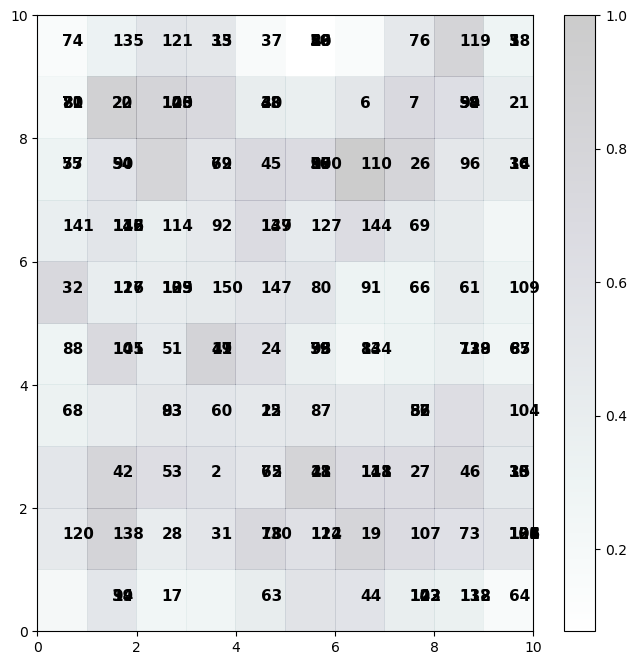

In [11]:
# Membuat plot untuk memvisualisasikan hasil SOM.
plt.figure(figsize=(8, 8))

# Iterasi melalui data dan menandai pemenang (neuron terbaik) untuk setiap sampel.
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
    
# Menampilkan peta jarak (distance map) dari SOM.
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()
